In [1]:
from glob import glob

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='AppleGothic')
plt.rc('axes', unicode_minus=False)

In [2]:
lst_data = sorted(glob('./data/*'))
var_data = ['cust_demo', 'prod_buy', 'service_use', 'prod_cat', 'partner', 'lpay']
for name, file in zip(var_data, lst_data):
    globals()[name] = pd.read_csv(file)

/var/folders/ty/d0l26xd500q6hk3ryfccwjy00000gn/T/ipykernel_1371/2034235638.py:4: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  globals()[name] = pd.read_csv(file)


In [3]:
for name in var_data:
    print(name, ': ', globals()[name].shape)

cust_demo :  (29913, 4)
prod_buy :  (4381743, 10)
service_use :  (248304, 9)
prod_cat :  (1933, 4)
partner :  (8808, 4)
lpay :  (353184, 7)


In [8]:
df_trans_prod = pd.merge(prod_buy, cust_demo, on='cust', how='left')
df_trans_prod = pd.merge(df_trans_prod, prod_cat, on='pd_c', how='left')
df_trans_prod.head()

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct,ma_fem_dv,ages,zon_hlv,pd_nm,clac_hlv_nm,clac_mcls_nm
0,M430112881,A01000001113,1,A01,A010039,PD0290,20210101,10,15000.0,1,여성,50대,Z17,남성티셔츠,남성의류,남성의류상의
1,M646853852,A01000002265,1,A01,A010025,PD1369,20210101,10,79700.0,1,여성,40대,Z13,기타주방일회용품,주방잡화,주방일회용품
2,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1,여성,50대,Z17,남성티셔츠,남성의류,남성의류상의
3,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1,여성,50대,Z17,남성티셔츠,남성의류,남성의류상의
4,M430112881,A01000004946,1,A01,A010039,PD0290,20210101,10,19000.0,1,여성,50대,Z17,남성티셔츠,남성의류,남성의류상의


In [30]:
lst = list(service_use.columns)
lst.remove('vst_dt')
lst.remove('br_c')

In [77]:
df = service_use.copy()
df.drop(columns=['vst_dt'], inplace=True)
trans = pd.concat([prod_buy[lst+['pd_c']], df[lst], lpay[lst]])

In [78]:
trans.pd_c = trans.pd_c.fillna(trans.cop_c).map(lambda x: None if x.startswith('A') else x)
trans.dropna(inplace=True)

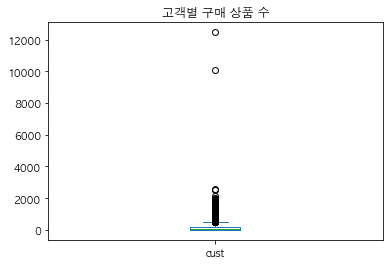

In [79]:
data = trans.groupby('cust').cust.count()
data.plot.box()
plt.title('고객별 구매 상품 수')
plt.show()

In [80]:
print('고객별 구매 상품 수 통계값:')
print(data.describe())

고객별 구매 상품 수 통계값:
count    29797.000000
mean       159.587677
std        227.314148
min          1.000000
25%         20.000000
50%         84.000000
75%        212.000000
max      12458.000000
Name: cust, dtype: float64


In [89]:
r_mat = pd.crosstab(trans.cust, trans.pd_c)

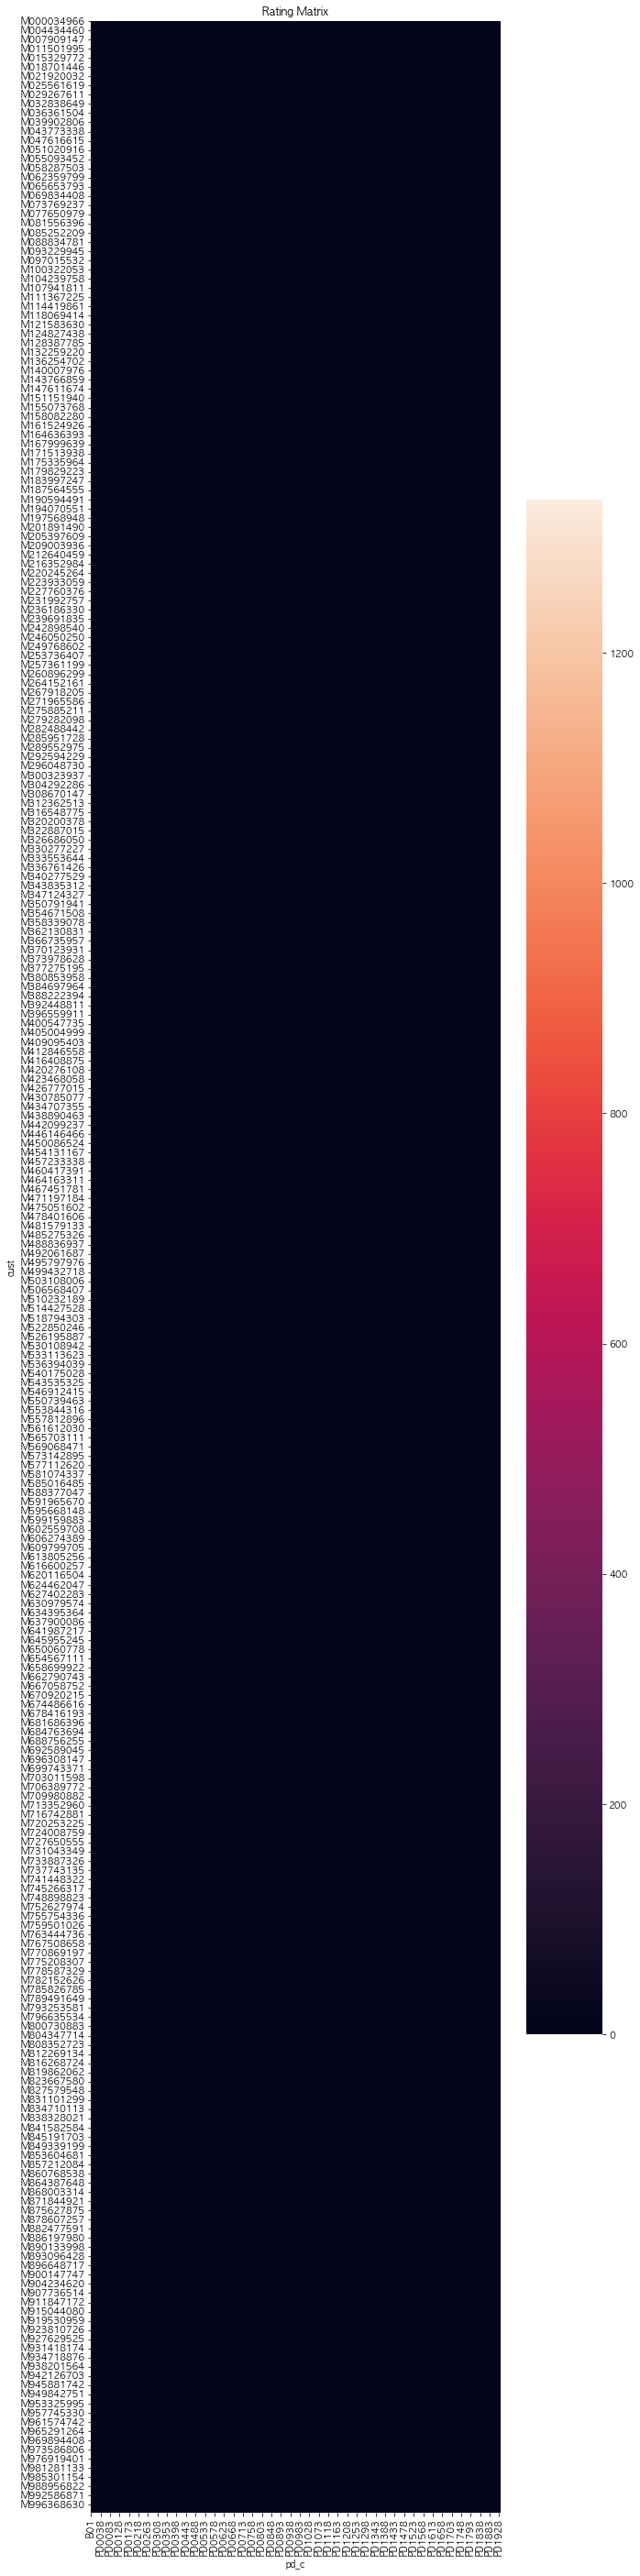

In [96]:
plt.figure(figsize=(10,50))
sns.heatmap(r_mat)
plt.title('Rating Matrix')
plt.show()

- 기존에 사용했던 추천 시스템 데이터들은 1회성이 높았다. (영화, 책 등)
- 하지만 롯데 데이터의 경우에는 1회성보다는 일정한 주기를 갖고 계속하여 구매가 일어난다.
  - 계열사, 상품군 별로 이 기간과 여부가 다를테니 이는 EDA 후 알맞게 처리해야 함
  - 이를 feature로 반영할 수 있는 방안?
- side information 반영
  - 어떤 side information?
  - 어떻게 반영?